# Exercise: Analysis - Births

<img src = "https://static01.nyt.com/images/2020/01/28/well/physed-babies/physed-babies-mobileMasterAt3x.jpg" width = 300>

In [1]:
import pandas as pd

In [2]:
births = pd.read_csv('births.csv')
births.head()

,date,gender,births
0,1969-01-01,F,4046
1,1969-01-01,M,4440
2,1969-01-02,F,4454
3,1969-01-02,M,4548
4,1969-01-03,F,4548


## Task: Calculate the number of births for each calendar month

**What about this ambiguity?**

Some people may expect to have:

- Jan 1969: X births
- Feb 1969: Y births
- ...
- Dec 1988: Z births

But others may expect:
- Jan (whatever the year): X births
- Feb (whatever the year): Y births
- ...
- Dec (whatever the year): Z births

**Questions are often ambiguous!** You will very very often encounter questions that leave some space for interpretation. As data analyst, we do not like that. So the first thing is to immediatealy ask for clarification. One way is, as we did here, to show them the kind of results you intend to deliver, and to have them validate that before jumping into the analysis.

## First approach

In [3]:
# We need to have the date in the datetime format.
# Here they are well formated, so there are no obstacles.
births['date'] = pd.to_datetime(births['date'])
births.head()

,date,gender,births
0,1969-01-01,F,4046
1,1969-01-01,M,4440
2,1969-01-02,F,4454
3,1969-01-02,M,4548
4,1969-01-03,F,4548


<AxesSubplot:xlabel='date'>

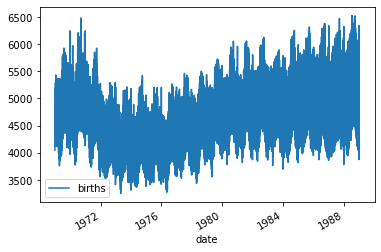

In [4]:
# Quick viz
births.plot(x="date", y="births")

In [5]:
# Let's extract the year and the month
births['year'] = births['date'].dt.year
births['month_as_a_nb'] = births['date'].dt.month
births['week'] = births['date'].dt.week
births['dow'] = births['date'].dt.dayofweek
births['month'] = births['date'].dt.month_name() # we could also use "month" instead of "month_name()", see the difference in the documentation
births.head()

<ipython-input-5-26084d0bfaba>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  births['week'] = births['date'].dt.week


,date,gender,births,year,month_as_a_nb,week,dow,month
0,1969-01-01,F,4046,1969,1,1,2,January
1,1969-01-01,M,4440,1969,1,1,2,January
2,1969-01-02,F,4454,1969,1,1,3,January
3,1969-01-02,M,4548,1969,1,1,3,January
4,1969-01-03,F,4548,1969,1,1,4,January


<AxesSubplot:xlabel='year,month'>

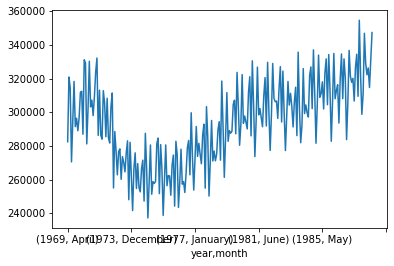

In [14]:
# Simple group by
births.groupby(['year', 'month'])['births'].sum().plot()

## Second approach

In [30]:
# Group only by month
births.groupby('month')['births'].sum()

month
April        5560775
August       6309764
December     5904376
February     5362585
January      5759165
July         6220295
June         5758571
March        5868140
May          5785220
November     5695273
October      6055372
September    6205972
Name: births, dtype: int64

<AxesSubplot:xlabel='month'>

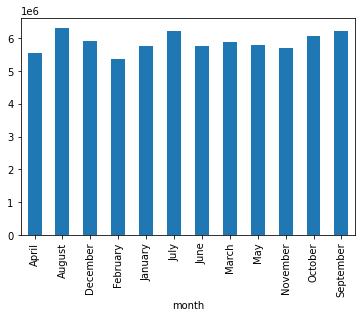

In [32]:
res = births.groupby('month')['births'].sum()

res.plot(kind="bar")

<AxesSubplot:xlabel='month'>

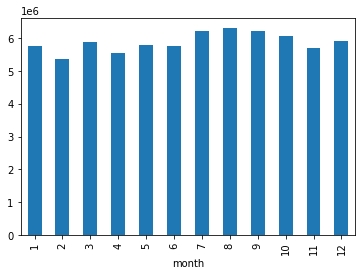

In [33]:
# It is sorted in alphabetical order...
# Let's use month nb instead
births['month'] = births['date'].dt.month
res = births.groupby('month')['births'].sum()
res.plot(kind="bar")